In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

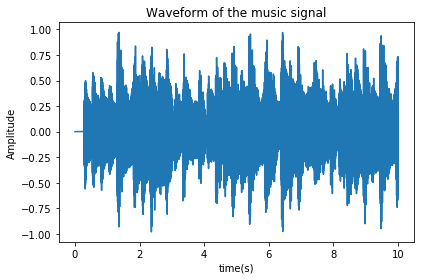

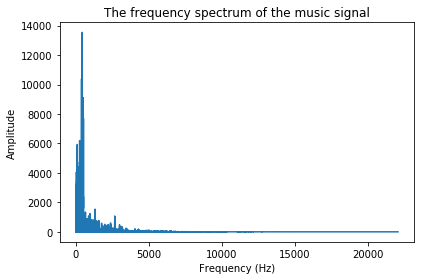

In [2]:
music = thinkdsp.read_wave('music.wav').segment(start = 0, duration = 10)
music.plot()
thinkdsp.decorate(xlabel = 'time(s)', ylabel = 'Amplitude', title = "Waveform of the music signal")
music_spec = music.make_spectrum()
plt.figure()
music_spec.plot()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Amplitude", title = "The frequency spectrum of the music signal")
music.make_audio()

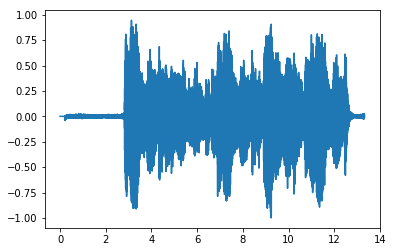

In [25]:
recv = thinkdsp.read_wave('multi-speaker.wav')
recv.plot()
recv.make_audio()

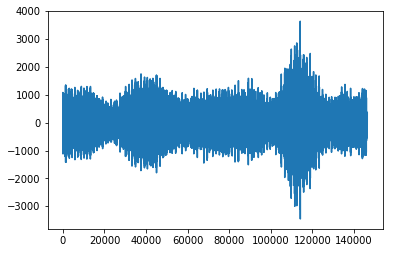

In [26]:
corr = np.correlate(recv.ys, music.ys, 'valid')
plt.plot(corr)

114157


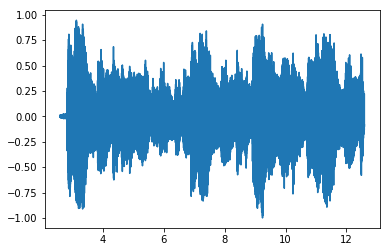

In [27]:
start = list(corr).index(np.max(corr))
print(start)
recv_seg = recv.segment(start = start/44100, duration = 10)
recv_seg.plot()
recv_seg.make_audio()

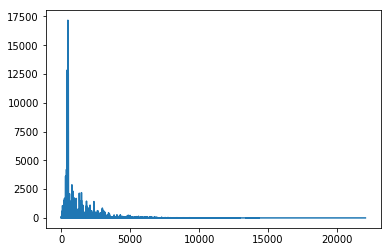

In [28]:
recv_seg_spec = recv_seg.make_spectrum()
recv_seg_spec.plot()

Text(0,0.5,'Amplitude')

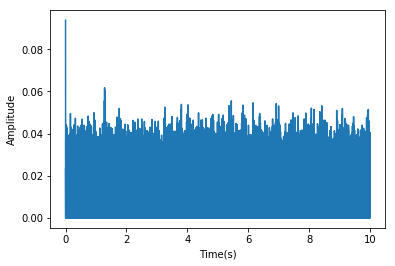

In [29]:
cir = np.fft.ifft(np.fft.fft(recv_seg.ys)/np.fft.fft(music.ys))
plt.figure()
x = np.linspace(0, len(cir)/44100, len(cir))
plt.plot(x,np.abs(cir))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

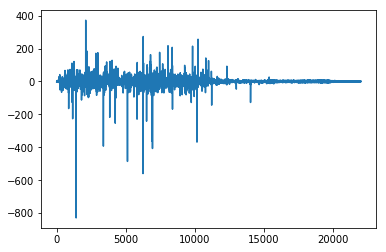

In [30]:
H = np.fft.rfft(recv_seg.ys)/np.fft.rfft(music.ys)
x = np.linspace(0, 44100/2, len(H))
plt.plot(x, H)

<Container object of 3 artists>

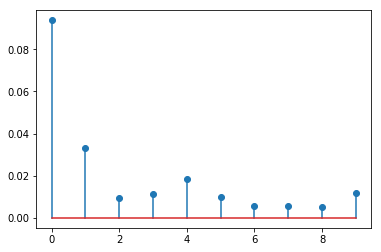

In [8]:
plt.stem(np.abs(cir[:10]))

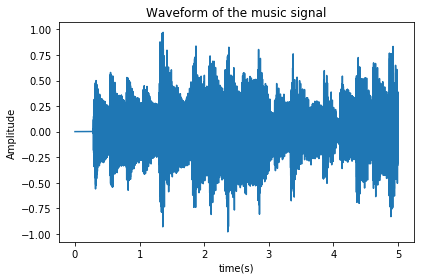

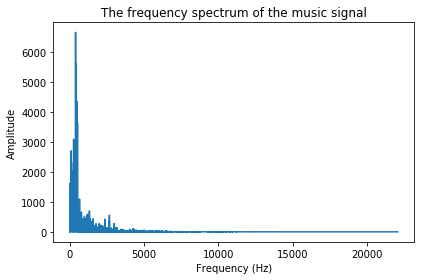

In [9]:
music = thinkdsp.read_wave('music.wav').segment(start = 0, duration = 5)
music.plot()
thinkdsp.decorate(xlabel = 'time(s)', ylabel = 'Amplitude', title = "Waveform of the music signal")
music_spec = music.make_spectrum()
plt.figure()
music_spec.plot()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Amplitude", title = "The frequency spectrum of the music signal")
music.make_audio()

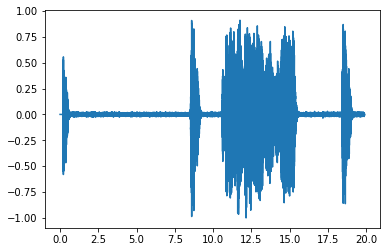

In [10]:
recv = thinkdsp.read_wave('multi-speaker2.wav')
recv.plot()
recv.make_audio()

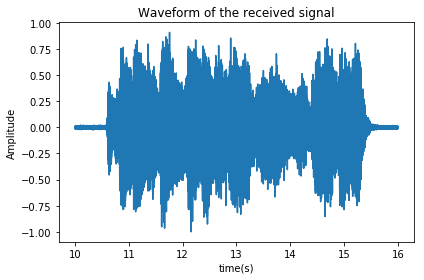

In [11]:
recv_valid = recv.segment(start = 10, duration = 6)
recv_valid.plot()
thinkdsp.decorate(xlabel = 'time(s)', ylabel = 'Amplitude', title = "Waveform of the received signal")

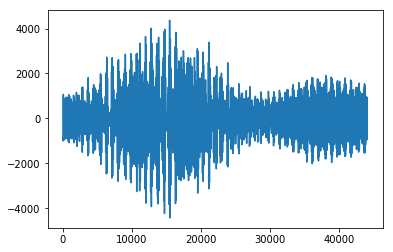

In [12]:
corr = np.correlate(recv_valid.ys, music.ys, 'valid')
plt.plot(corr)

15458


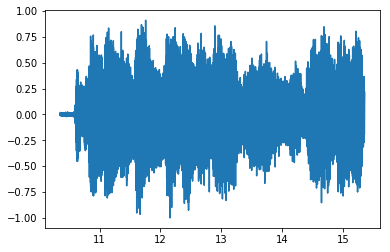

In [13]:
start = list(corr).index(np.max(corr))
print(start)
recv_seg = recv.segment(start = 10+start/44100, duration = 5)
recv_seg.plot()
recv_seg.make_audio()

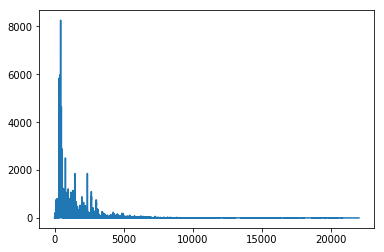

In [14]:
recv_seg_spec = recv_seg.make_spectrum()
recv_seg_spec.plot()

Text(0,0.5,'Amplitude')

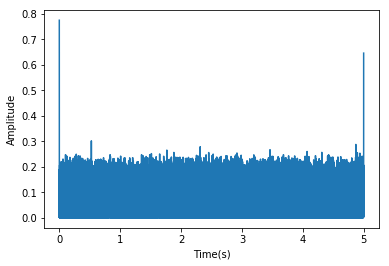

In [22]:
cir = np.fft.ifft(np.fft.fft(recv_seg.ys)/np.fft.fft(music.ys))
plt.figure()
x = np.linspace(0, len(cir)/44100, len(cir))
plt.plot(x,np.abs(cir))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

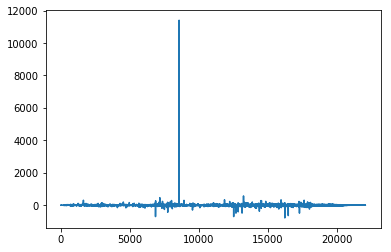

In [23]:
H = np.fft.rfft(recv_seg.ys)/np.fft.rfft(music.ys)
x = np.linspace(0, 44100/2, len(H))
plt.plot(x, H)

<Container object of 3 artists>

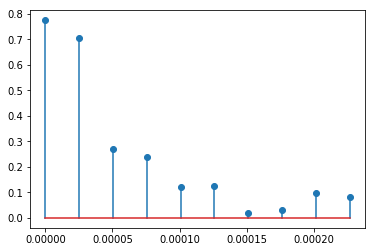

In [17]:
plt.stem(np.linspace(0, 10/44100, 10),np.abs(cir[:10]))

<Container object of 3 artists>

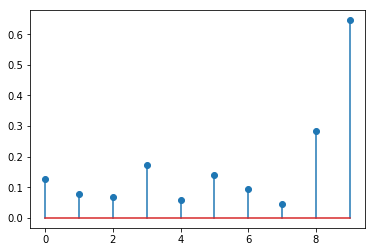

In [16]:
plt.stem(np.abs(cir[-10:]))